Full name: Lastname, Firstname

Perm number: 

Change the filename to HW8_ followed by your last name and first name with an underscore between them. For example, Abraham Lincoln's homework filename would be "HW8_Lincoln_Abraham.ipynb"

### **Week 8, Homework**

This week, we will simulate a few biological models. 

Note: Even though you're only completing the ODE functions, study the practice code so that you can get familiar with the overall flow of simulation and how to use the Matplotlib.

---

#### Problem 1 (3 pt) 

#### **Predator-prey model**

[Link to Wikipedia](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations)


Lotka-Volterra's predator-prey model is one of the most well-known models. It has two differential equations.

  <center>$\displaystyle\frac{dx}{dt}=ax-bxy=x(a-by)$</center>

  <br>
  <center>$\displaystyle\frac{dy}{dt}=-cy+dxy=y(-c+dx)$</center>
  <br>
, where $a$, $b$, $c$, $d>0$.

$x$ is the biomass of the prey population

$y$ is the biomass of the predator population

$a$ is the intrinsic growth rate of the prey $x$. In the absence of the predator ($y=0$), the prey population $x$ will exponentially grow because $dx/dt=ax$.

$c$ is the death rate of the predator. In the absence of the prey ($x=0$), the predator population $y$ approaches zero because $dy/dt=-cy$

$b$ is the per capita reduction in prey per predator

$d$ is the per capita increase in predator per prey

Let's set $a=1.5$, $b=1$, $c=3$, $d=1$



Write an ODE function that can be used in "solve_ivp"


The output should look like below:
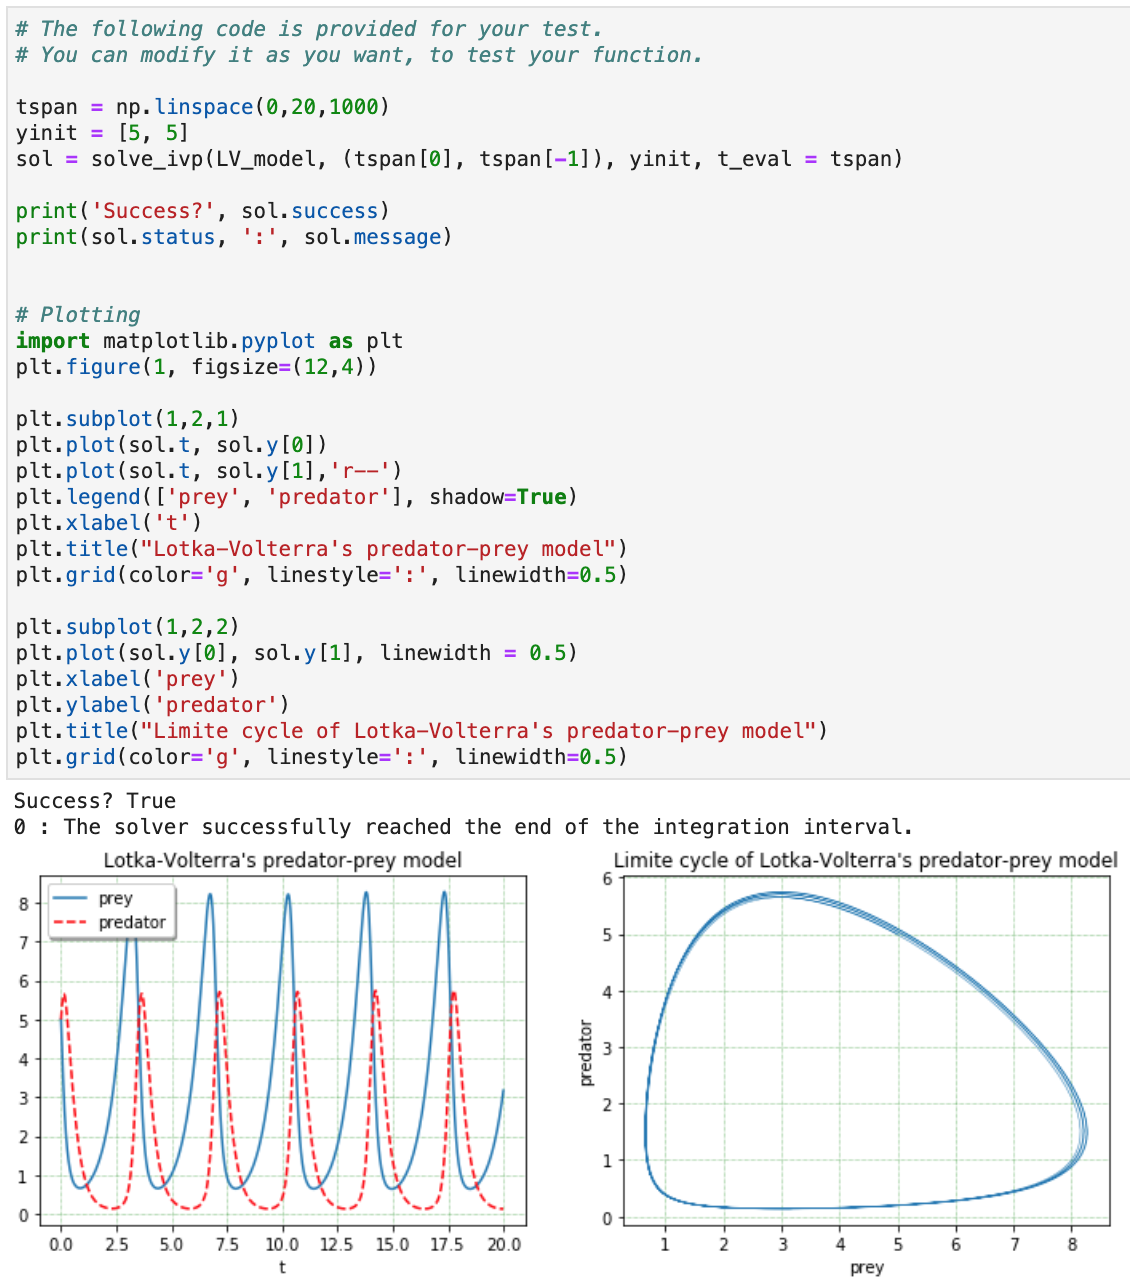

In [ ]:
# Change the following function.

# DO NOT CHANGE THE FUNCTION NAME AND ARGUMENTS!!!


# Packages to import
import numpy as np
from scipy.integrate import solve_ivp

def LV_model(t, z):
    
    x, y = z  # x: the biomass of the prey population; y: the biomass of the predator population
    
    a = 1.5
    b = 1
    c = 3
    d = 1
    
    dxdt = a*x - b*x*y
    dydt = -c*y + d*x*y
        
    return [dxdt, dydt]

In [ ]:
# The following code is provided for your test.
# You can modify it as you want, to test your function.

tspan = np.linspace(0,20,1000)
yinit = [5, 5]
sol = solve_ivp(LV_model, (tspan[0], tspan[-1]), yinit, t_eval = tspan)

print('Success?', sol.success)
print(sol.status, ':', sol.message)


# Plotting
import matplotlib.pyplot as plt
plt.figure(1, figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1],'r--')
plt.legend(['prey', 'predator'], shadow=True)
plt.xlabel('t')
plt.title("Lotka-Volterra's predator-prey model")
plt.grid(color='g', linestyle=':', linewidth=0.5)

plt.subplot(1,2,2)
plt.plot(sol.y[0], sol.y[1], linewidth = 0.5)
plt.xlabel('prey')
plt.ylabel('predator')
plt.title("Limite cycle of Lotka-Volterra's predator-prey model")
plt.grid(color='g', linestyle=':', linewidth=0.5)

---

#### Problem 2 (3 pt)  

#### **Goodwin Oscillator** (Gene regulatory network)

[Link to a paper](https://link.springer.com/article/10.1007/s10441-020-09379-8)

In 1965, Brian Goodwin proposed a generic model of an oscillatory genetic circuit, which is depicted below.

<center><img src="Goodwin.png"/></center>

A gene is transcribed into an mRNA X, which is translated into an enzyme Y, which catalyzes production of metabolite Z, which causes inhibition of expression of the gene. Neglecting the specifics of catalysis and inhibition, Goodwin formulated the model in terms of concentration $x$, $y$, and $z$ as

<center>$\displaystyle\frac{d}{dt}x(t) = \displaystyle\frac{a}{k^n+z(t)^n} -bx(t)$</center><br>
<center>$\displaystyle\frac{d}{dt}y(t) = \alpha x(t) -\beta y(t)$</center><br>
<center>$\displaystyle\frac{d}{dt}z(t) = \gamma y(t) -\delta z(t)$</center><br>

The behavior of the oscillator depends on paprameters. An example set of parameters is $a=360$ (concentration/time), $k=1.368$ (concentration), $b=1$ (/time), $\alpha=1$ (/time), $\beta=0.6$ (/time), $\gamma=1$ (/time), $\delta=0.8$ (/time), n=12.


Write an ODE function that can be used in "solve_ivp"

The outcome of this problem should look like below:

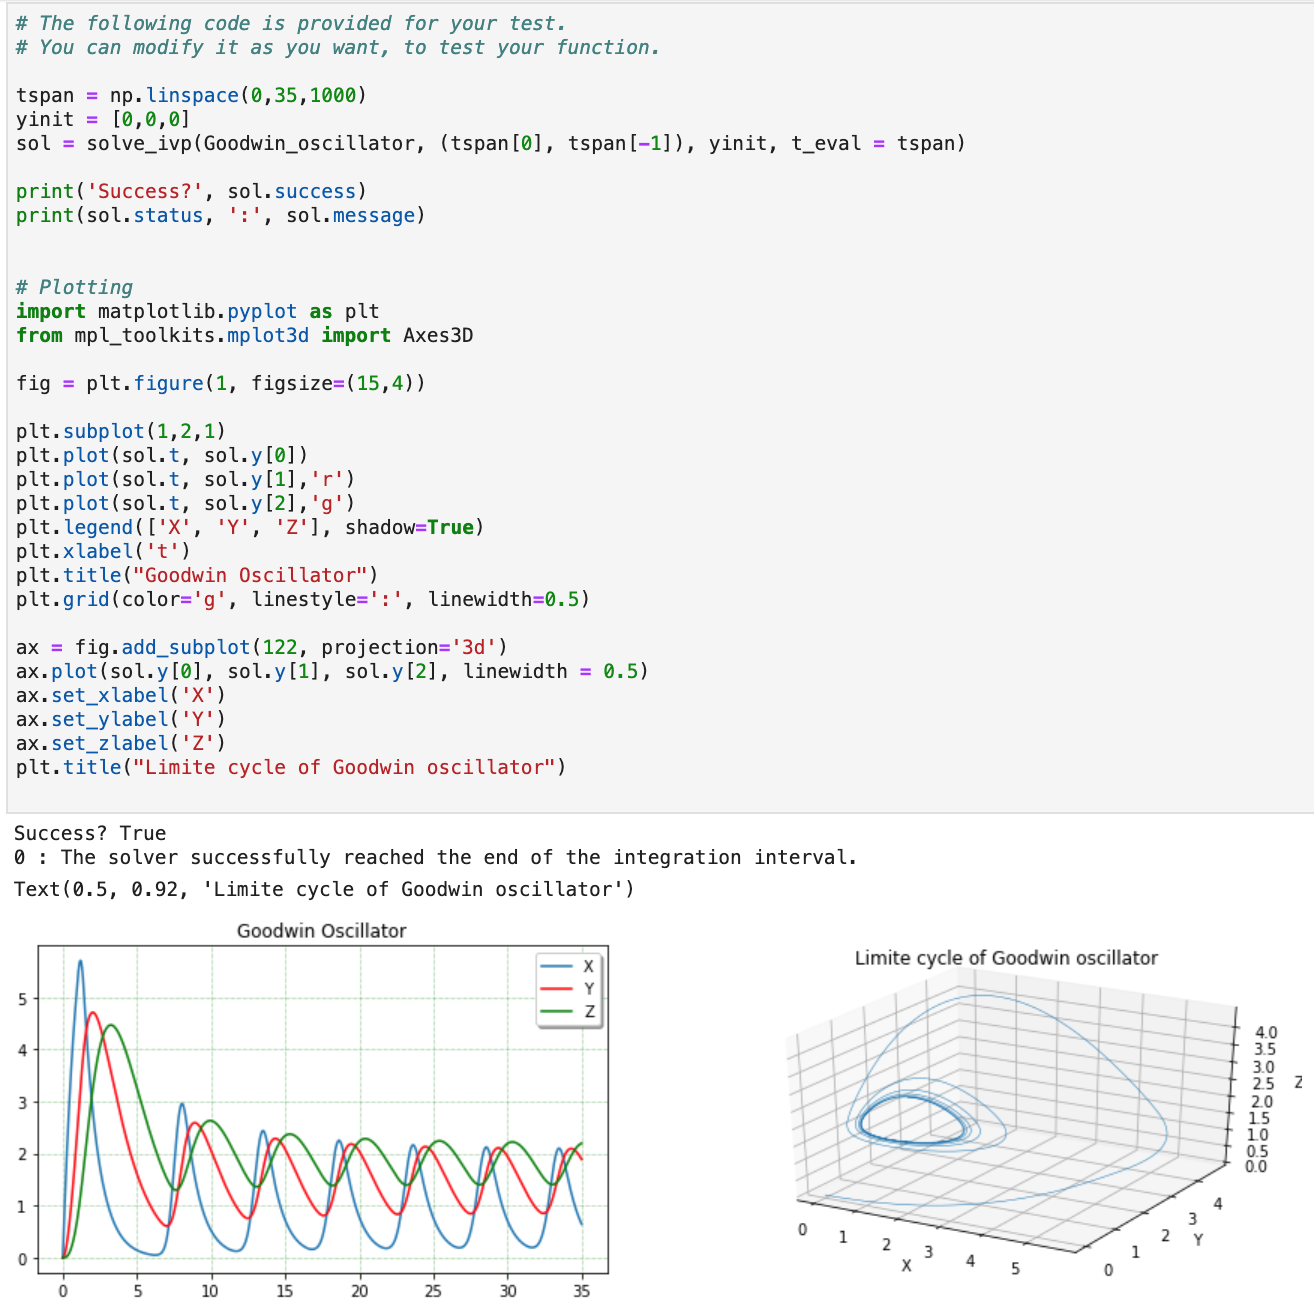
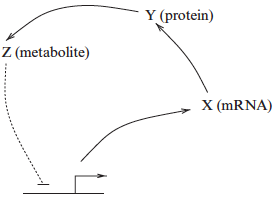

In [ ]:
# Change the following function.

# DO NOT CHANGE THE FUNCTION NAME AND ARGUMENTS!!!


import numpy as np
from scipy.integrate import solve_ivp

def Goodwin_oscillator(t, g):
    x, y, z = g
    
    a = 360
    k = 1.368
    n = 12
    b = 1
    alpha = 1
    beta = 0.6
    gamma = 1
    delta = 0.8
    
    dxdt = a/(k**n + z**n) - b*x
    dydt = alpha*x - beta*y
    dzdt = gamma*y - delta*z
    
    return np.array([dxdt, dydt, dzdt])

In [ ]:
# The following code is provided for your test.
# You can modify it as you want, to test your function.

tspan = np.linspace(0,35,1000)
yinit = [0,0,0]
sol = solve_ivp(Goodwin_oscillator, (tspan[0], tspan[-1]), yinit, t_eval = tspan)

print('Success?', sol.success)
print(sol.status, ':', sol.message)


# Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(15,4))

plt.subplot(1,2,1)
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1],'r')
plt.plot(sol.t, sol.y[2],'g')
plt.legend(['X', 'Y', 'Z'], shadow=True)
plt.xlabel('t')
plt.title("Goodwin Oscillator")
plt.grid(color='g', linestyle=':', linewidth=0.5)

ax = fig.add_subplot(122, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2], linewidth = 0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Limite cycle of Goodwin oscillator")


---

#### Problem 3 (4 pt)

#### **FitzHugh-Nagumo model** (A simplified model of the neuron)
[Link to scholarpedia](http://www.scholarpedia.org/article/FitzHugh-Nagumo_model)

The FitzHugh-Nagumo model is a two-dimensional simplification of the Hodgkin-Huxley model of spike generation in squid giant axons.

<center>$\displaystyle\frac{d}{dt}v = v - \displaystyle\frac{v^3}{3} - w + RI$</center><br>
<center>$\tau\displaystyle\frac{d}{dt}w = v+a-bw$</center><br>


where, $v$ is the membrane potential, $w$ is a recovery variable, $I$ is the magnitude of stimulus current. Here, we set $R=1$ for simplicity.

Here, we will test multiple sets of parameters. `solve_vip` allows ODE function definition with more than 2 arguments. In this case, the additional arguments should be passed to the `solve_ivp`. See the example code below.


Write an ODE function receiving mote than two arguments that defines the parameters of the F-N model.

Use two parameter sets for $a$, $b$, $\tau$, and $I$.<br>
1. $a=0.7$, $b=0.8$, $\tau=12.5$, and $I=0.5$
2. $a=0.3$, $b=1.4$, $\tau=20$, and $I=0.23$


The result should look like below:

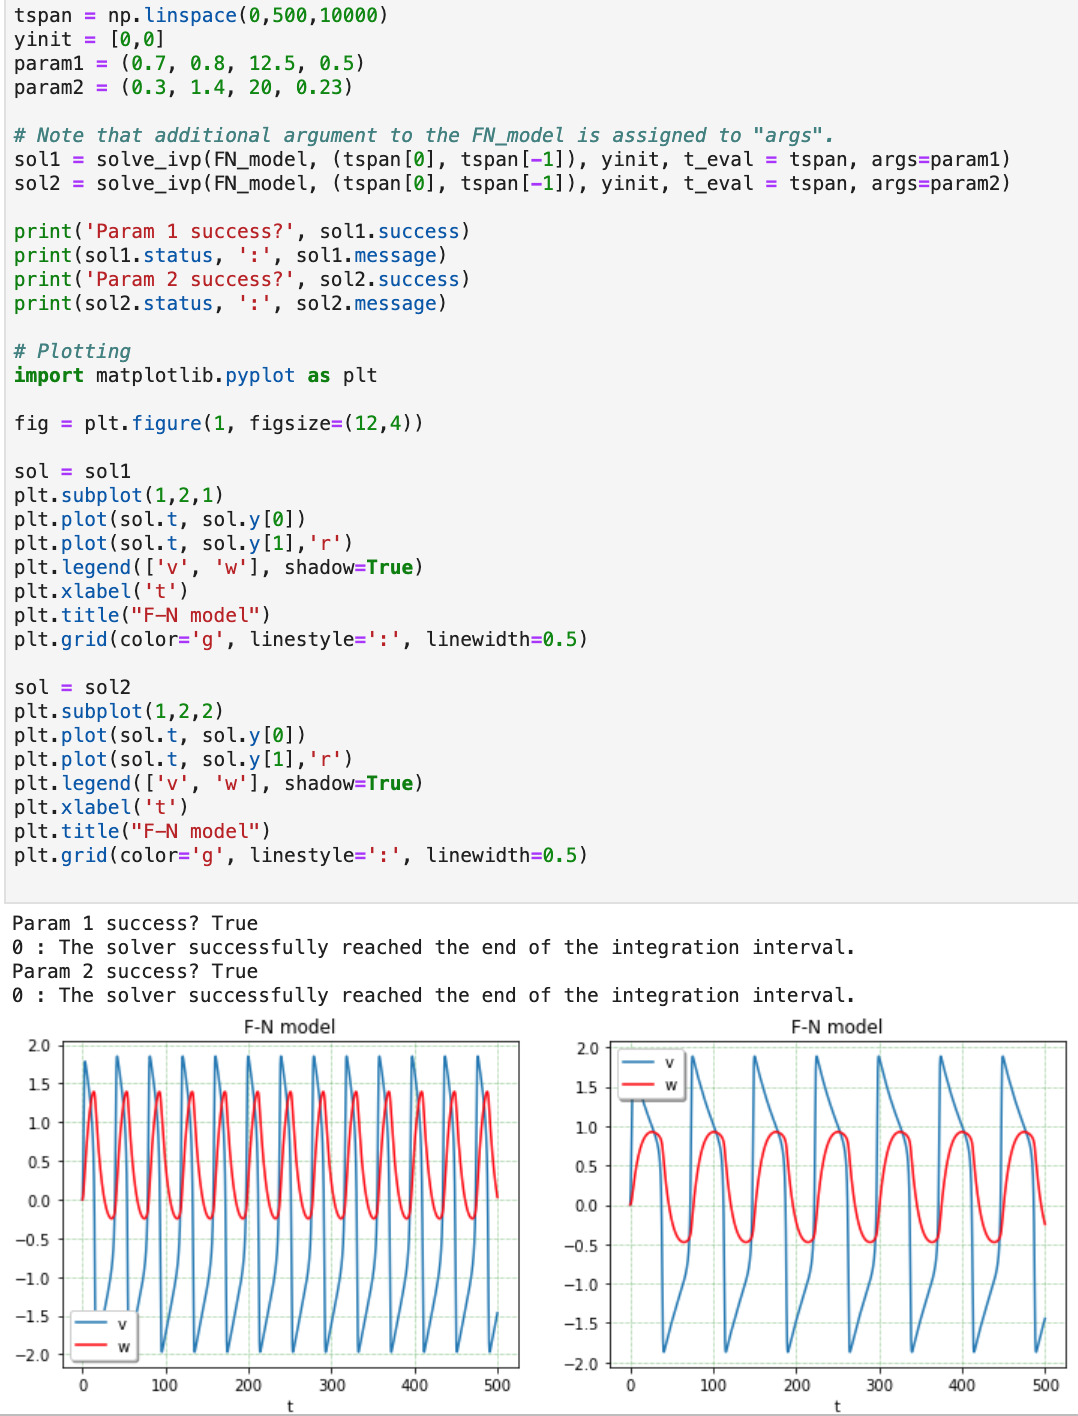

In [ ]:
# Change the following function.

# DO NOT CHANGE THE FUNCTION NAME AND ARGUMENTS!!!


import numpy as np
from scipy.integrate import solve_ivp

def FN_model(t, x, a, b, tau, I):

    v, w = x
    
    dvdt = v - v**3/3 - w + I
    dwdt = (v + a -b*w)/tau
    
    
    return np.array([dvdt, dwdt])

In [ ]:
# The following code is provided for your test.
# You can modify it as you want, to test your function.

tspan = np.linspace(0,500,10000)
yinit = [0,0]
param1 = (0.7, 0.8, 12.5, 0.5)
param2 = (0.3, 1.4, 20, 0.23)

# Note that additional argument to the FN_model is assigned to "args".
sol1 = solve_ivp(FN_model, (tspan[0], tspan[-1]), yinit, t_eval = tspan, args=param1)
sol2 = solve_ivp(FN_model, (tspan[0], tspan[-1]), yinit, t_eval = tspan, args=param2)

print('Param 1 success?', sol1.success)
print(sol1.status, ':', sol1.message)
print('Param 2 success?', sol2.success)
print(sol2.status, ':', sol2.message)

# Plotting
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(12,4))

sol = sol1
plt.subplot(1,2,1)
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1],'r')
plt.legend(['v', 'w'], shadow=True)
plt.xlabel('t')
plt.title("F-N model")
plt.grid(color='g', linestyle=':', linewidth=0.5)

sol = sol2
plt.subplot(1,2,2)
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1],'r')
plt.legend(['v', 'w'], shadow=True)
plt.xlabel('t')
plt.title("F-N model")
plt.grid(color='g', linestyle=':', linewidth=0.5)


---
## **Check your code before you commit and push your homework**

### If there is any error in your code, including any practice code you wrote to test your answers, your homework will not be scored.

#### Here are steps you must take to make sure there is no error in your script.
1. You must first restart the kernel. It is in the menu "kernel->Restart Kernel". Or click the restart button.
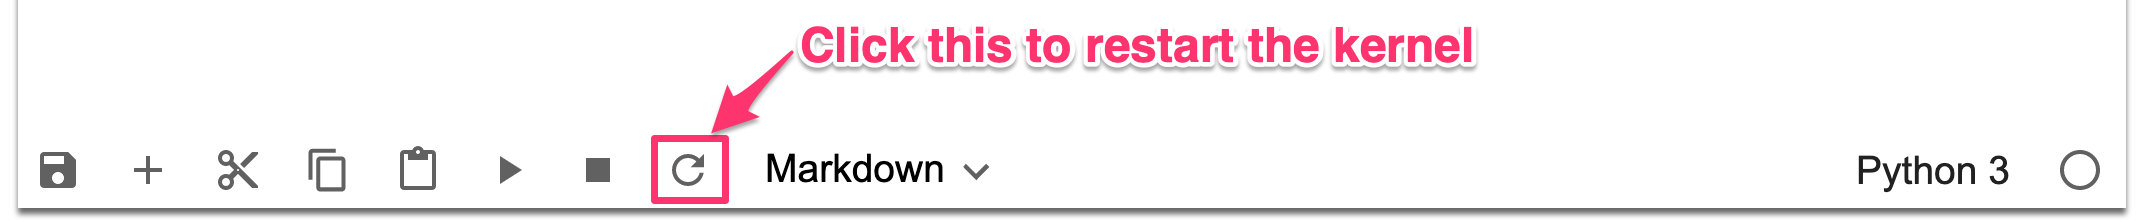
2. Run all cells. You can do this by clicking the menu "Run->Run all cells".
3. Fix any errors.
4. Repeate 1-3 until you don't see any errors.
5. **IMPORTNAT: Clear All Outputs (Right mouse click->Clear All Output)**
6. **IMPORTNAT: Save your file and change the filename to "HWn_Lastname_Firstname.ipynb"**
7. **Run the following cell and make sure you don't see any errors. This is the code that the TA or the instructor will use to generate testable code.**

In [ ]:
# If the name of the student is Abraham Lincoln, then the code should look
# like below.

!jupyter nbconvert --to script 'HW8_Lincoln_Abraham.ipynb'
import HW8_Lincoln_Abraham as hw  # Change this to your name
dir(hw)

# After running this code, you should see, at the bottom, the function names
# of your homework answers.

# If you see errors, please make sure the file names, module names are all
# properly set up. Then restart the kernel and try it again.
